## 7.11　結果確認


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

In [5]:
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [6]:
x_select = x_org[:, [0, 2]]
print('元データ', x_select.shape, y_org.shape)

元データ (150, 2) (150,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_select, y_org, train_size=75, test_size=75, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


In [8]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

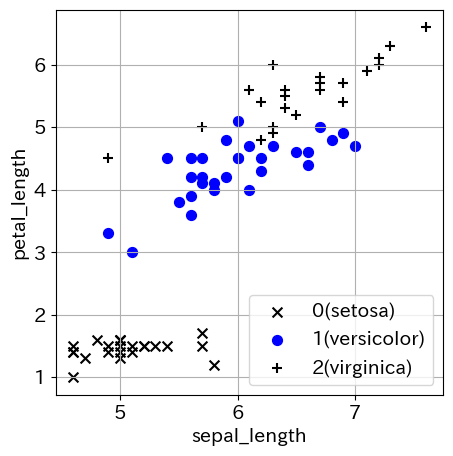

In [9]:
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='k', s=50, label='0(setosa)')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='b', s=50, label='1(versicolor)')
plt.scatter(x_t2[:, 0], x_t2[:, 1], marker='+', c='k', s=50, label='2(virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [10]:
n_input = x_train.shape[1]
n_output = len(list(set(y_train)))
print(f'n_input: {n_input} n_output: {n_output}')

n_input: 2 n_output: 3


In [11]:
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)

    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

net = Net(n_input, n_output)

In [12]:
for parameter in net.named_parameters():
  print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


In [13]:
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [14]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

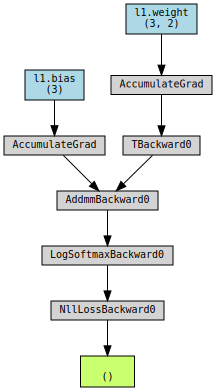

In [15]:
outputs = net(inputs)
loss = criterion(outputs, labels)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [16]:
print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,  7.3000, 11.1000,
        12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000, 11.7000, 13.3000,
         7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,  7.9000, 12.2000,
        14.6000, 12.0000, 10.2000, 10.5000,  7.1000,  7.3000, 12.6000, 12.7000,
         7.4000,  7.7000, 10.8000, 11.5000, 11.5000, 14.0000, 12.8000, 10.8000,
        10.8000, 15.2000,  7.5000,  7.8000, 11.1000, 13.6000, 12.9000, 14.2000,
        12.7000,  7.6000, 10.9000,  7.0000, 10.9000, 11.2000,  7.4000, 11.7000,
        13.3000, 11.5000, 13.4000, 12.7000,  7.7000, 11.8000,  7.0000, 12.6000,
        11.7000, 10.9000,  9.2000, 12.2000, 10.4000, 12.1000,  7.5000,  9.1000,
        11.1000, 12.0000, 14.3000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [17]:
torch.max(outputs, 1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [18]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

`history`: P. 222

In [19]:
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = net(inputs)
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()
  predicted = torch.max(outputs, 1)[1]
  train_loss = loss.item()
  train_acc = (predicted == labels).sum() / len(labels)

  outputs_test = net(inputs_test)
  loss_test = criterion(outputs_test, labels_test)
  predicted_test = torch.max(outputs_test, 1)[1]
  val_loss = loss_test.item()
  val_acc = (predicted_test == labels_test).sum() / len(labels_test)

  if ((epoch % 10 == 0)):
    print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09263, val_acc: 0.26667
Epoch [10/10000], loss: 1.03580 acc: 0.40000 val_loss: 1.06403, val_acc: 0.26667
Epoch [20/10000], loss: 1.00477 acc: 0.40000 val_loss: 1.03347, val_acc: 0.26667
Epoch [30/10000], loss: 0.97672 acc: 0.40000 val_loss: 1.00264, val_acc: 0.26667
Epoch [40/10000], loss: 0.95057 acc: 0.41333 val_loss: 0.97351, val_acc: 0.26667
Epoch [50/10000], loss: 0.92616 acc: 0.48000 val_loss: 0.94631, val_acc: 0.38667
Epoch [60/10000], loss: 0.90338 acc: 0.69333 val_loss: 0.92098, val_acc: 0.56000
Epoch [70/10000], loss: 0.88212 acc: 0.70667 val_loss: 0.89740, val_acc: 0.60000
Epoch [80/10000], loss: 0.86227 acc: 0.70667 val_loss: 0.87545, val_acc: 0.61333
Epoch [90/10000], loss: 0.84373 acc: 0.70667 val_loss: 0.85500, val_acc: 0.62667
Epoch [100/10000], loss: 0.82640 acc: 0.70667 val_loss: 0.83594, val_acc: 0.62667
Epoch [110/10000], loss: 0.81019 acc: 0.72000 val_loss: 0.81815, val_acc: 0.62667
Epoch [120/10000], loss: 0.

In [20]:
print(f'初期状態 : 損失: {history[0, 3]:.5f} 精度: {history[0, 4]:.5f}')
print(f'最終状態: 損失: {history[-1, 3]} 精度: {history[-1, 4]:.5f}')

初期状態 : 損失: 1.09263 精度: 0.26667
最終状態: 損失: 0.19794999063014984 精度: 0.96000


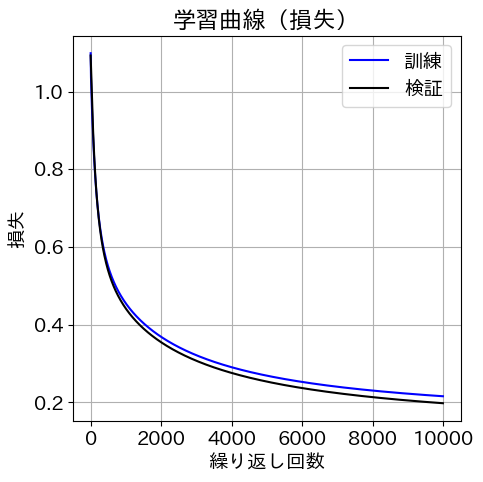

In [21]:
plt.plot(history[:, 0], history[:, 1], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.legend()
plt.show()

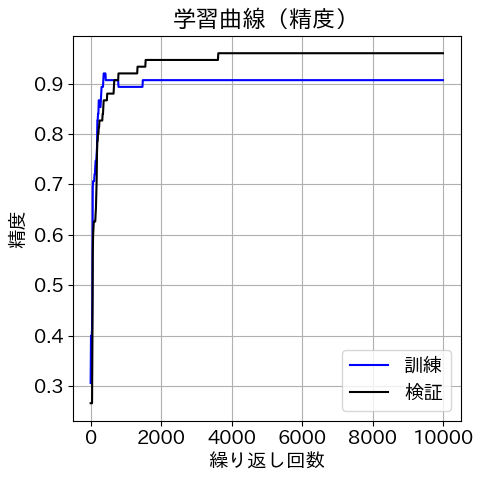

In [22]:
plt.plot(history[:, 0], history[:, 2], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線（精度）')
plt.legend()
plt.show()

In [23]:
labels

tensor([1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1,
        2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2,
        2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1,
        1, 2, 2])

In [24]:
print(labels[[0, 2, 3]])

tensor([1, 0, 2])


In [25]:
inputs

tensor([[6.3000, 4.7000],
        [7.0000, 4.7000],
        [5.0000, 1.6000],
        [6.4000, 5.6000],
        [6.3000, 5.0000],
        [5.0000, 1.6000],
        [4.9000, 1.4000],
        [6.1000, 4.0000],
        [6.5000, 4.6000],
        [6.3000, 6.0000],
        [5.8000, 1.2000],
        [4.6000, 1.4000],
        [5.5000, 3.8000],
        [5.0000, 1.6000],
        [5.9000, 4.8000],
        [6.9000, 5.4000],
        [4.8000, 1.6000],
        [6.7000, 5.8000],
        [5.7000, 1.5000],
        [5.7000, 1.7000],
        [6.7000, 5.0000],
        [4.6000, 1.0000],
        [5.4000, 1.5000],
        [6.6000, 4.6000],
        [7.3000, 6.3000],
        [6.6000, 4.4000],
        [5.6000, 3.6000],
        [5.6000, 3.9000],
        [4.6000, 1.5000],
        [5.0000, 1.3000],
        [6.8000, 4.8000],
        [6.1000, 5.6000],
        [4.9000, 1.5000],
        [5.2000, 1.5000],
        [5.6000, 4.2000],
        [6.0000, 4.5000],
        [6.2000, 4.3000],
        [7.1000, 5.9000],
        [6.9

In [26]:
i3 = inputs[[0, 2, 3], :]
print(i3.data.numpy())

[[6.3 4.7]
 [5.  1.6]
 [6.4 5.6]]


In [27]:
softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print(o3.data.numpy())
print(k3.data.numpy())

[[ 8.8071 14.1937 12.9986]
 [12.8262  9.8     0.1734]
 [ 6.7954 15.0928 17.1111]]
[[0.0035 0.765  0.2315]
 [0.9537 0.0463 0.    ]
 [0.     0.1173 0.8827]]


In [28]:
print(net.l1.weight.data)
print(net.l1.bias.data)

tensor([[ 3.0452, -2.5735],
        [ 1.3573,  0.8481],
        [-1.4026,  4.7253]])
tensor([ 1.7178,  1.6563, -0.3741])
